In [9]:
 # need notebook backend for interaction
# %matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# file-handling stuff for user, options abound! I like Tables and Pandas DataFrames
import pandas as pd
from astropy.table import Table
from astropy import units as u
from specutils import Spectrum1D

# import kosmos... if we do it right this should be the only other thing to import someday!
import sys  
sys.path.append('/Users/james/Dropbox/research_projects/kosmos/')

import kosmos
kosmos.__version__

'0.03'

In [10]:
biasfiles = pd.read_table('biaslist.txt', names=['impath'])['impath'].values
bias = kosmos.biascombine(biasfiles) 

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
 [astropy.io.fits.verify]

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.
a floating-point value was expected. [astropy.wcs.wcs]
a floating-point value was expected.


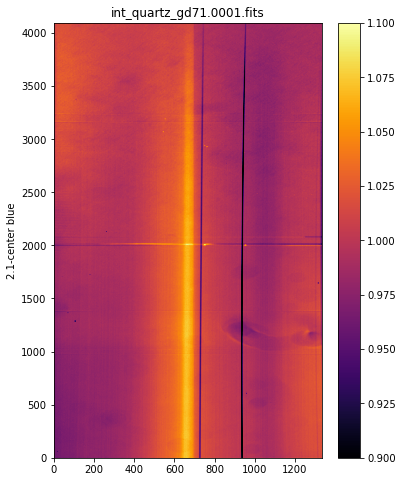

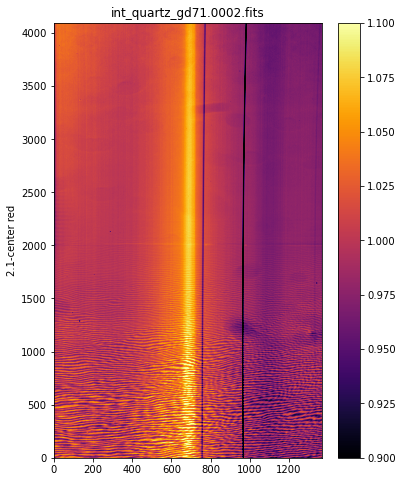

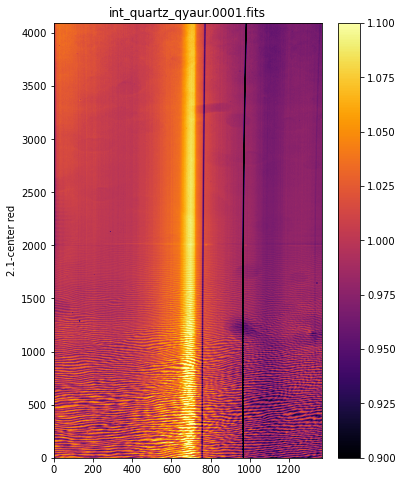

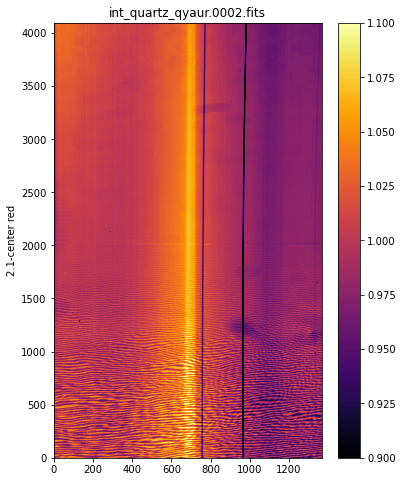

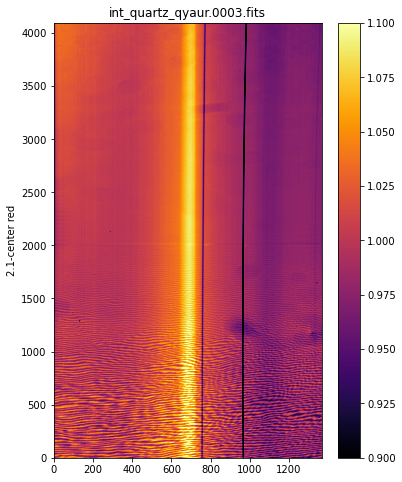

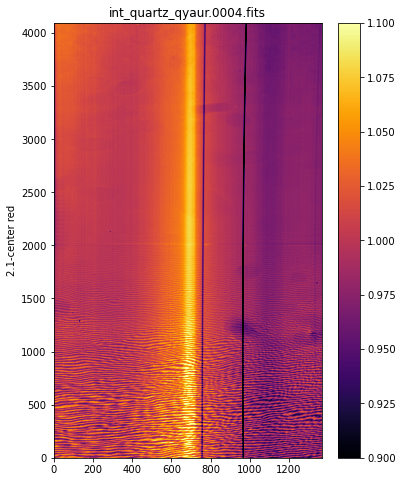

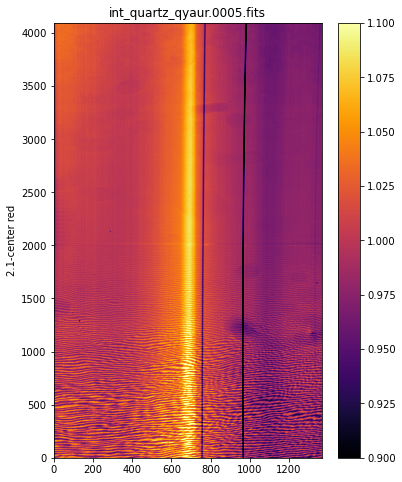

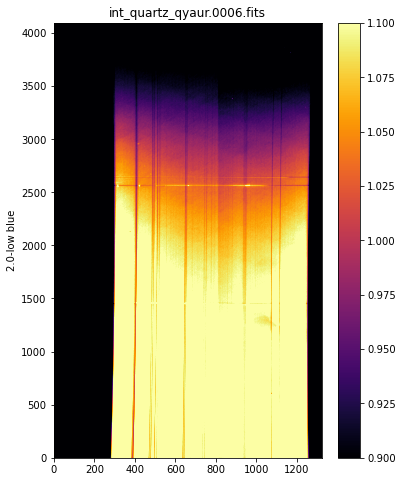

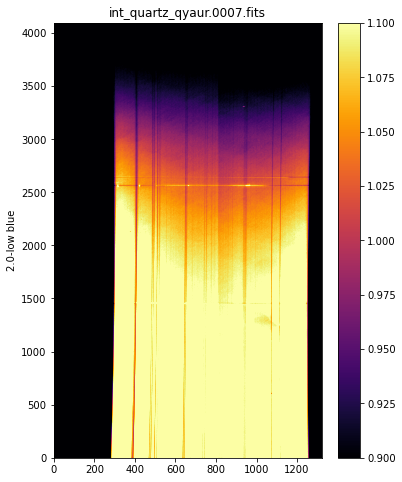

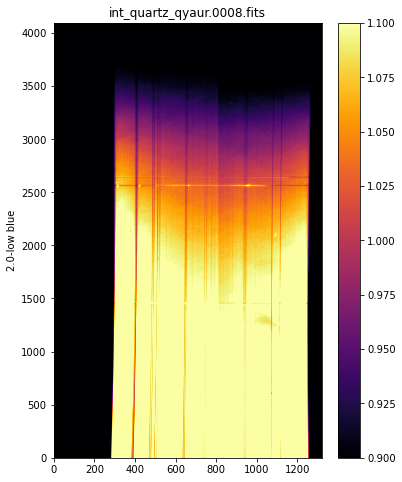

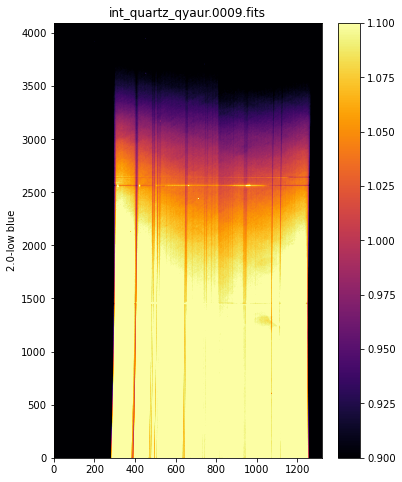

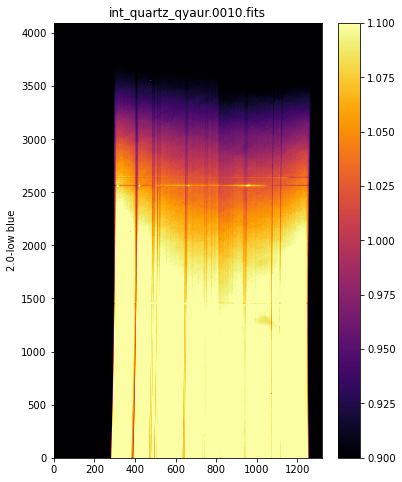

In [37]:
flatfiles = pd.read_table('int_quartz.txt', names=['impath'])['impath'].values

# flatfiles = ['truss_quartz_gd71.0001.fits']
for k in range(0,len(flatfiles)):
#     print(k)
    flat, ilum = kosmos.flatcombine([flatfiles[k]], 
                                    trim=False, illumcor=True, threshold=.99,
                                    responsecor=True, Waxis=0, Saxis=1)
    plt.figure(figsize=(6,8))
    plt.imshow(flat, origin='lower', aspect='auto', cmap=plt.cm.inferno)
    plt.clim(.9,1.1)
    plt.title(flatfiles[k])
    plt.colorbar()
    img = kosmos.proc(flatfiles[k], trim=False, Waxis=0) 
    plt.ylabel(img.header['slit'] + ' ' + img.header['DISPERSR'])
    plt.savefig(flatfiles[k]+'.png', dpi=150, bbox_inches='tight', pad_inches=0.25)
    

In [38]:
img.header['TELROT']

156.648011